In [1]:
#counting the null values in our data set.
import pandas as pd
mvc = pd.read_csv("nypd_mvc_2018.csv")

null_counts=mvc.isnull().sum()

In [2]:
null_counts

unique_key                 0
date                       0
time                       0
borough                20646
location                3885
on_street              13961
cross_street           29249
off_street             44093
pedestrians_injured        0
cyclist_injured            0
motorist_injured           0
total_injured              1
pedestrians_killed         0
cyclist_killed             0
motorist_killed            0
total_killed               5
vehicle_1                355
vehicle_2              12262
vehicle_3              54352
vehicle_4              57158
vehicle_5              57681
cause_vehicle_1          175
cause_vehicle_2         8692
cause_vehicle_3        54134
cause_vehicle_4        57111
cause_vehicle_5        57671
dtype: int64

In [3]:
# % missing value
null_counts_pct = null_counts / mvc.shape[0] * 100
null_counts_pct

unique_key              0.000000
date                    0.000000
time                    0.000000
borough                35.680216
location                6.714019
on_street              24.127264
cross_street           50.547836
off_street             76.201092
pedestrians_injured     0.000000
cyclist_injured         0.000000
motorist_injured        0.000000
total_injured           0.001728
pedestrians_killed      0.000000
cyclist_killed          0.000000
motorist_killed         0.000000
total_killed            0.008641
vehicle_1               0.613508
vehicle_2              21.191069
vehicle_3              93.930596
vehicle_4              98.779898
vehicle_5              99.683741
cause_vehicle_1         0.302433
cause_vehicle_2        15.021430
cause_vehicle_3        93.553850
cause_vehicle_4        98.698673
cause_vehicle_5        99.666459
dtype: float64

In [4]:
#both the counts and percentages to a dataframe to make them easier to compare

null_df = pd.DataFrame({'null_counts': null_counts, 'null_pct': null_counts_pct})
# Rotate the dataframe so that rows become columns and vice-versa
null_df = null_df.T.astype(int)

print(null_df)

             unique_key  date  time  borough  location  on_street  \
null_counts           0     0     0    20646      3885      13961   
null_pct              0     0     0       35         6         24   

             cross_street  off_street  pedestrians_injured  cyclist_injured  \
null_counts         29249       44093                    0                0   
null_pct               50          76                    0                0   

             ...  vehicle_1  vehicle_2  vehicle_3  vehicle_4  vehicle_5  \
null_counts  ...        355      12262      54352      57158      57681   
null_pct     ...          0         21         93         98         99   

             cause_vehicle_1  cause_vehicle_2  cause_vehicle_3  \
null_counts              175             8692            54134   
null_pct                   0               15               93   

             cause_vehicle_4  cause_vehicle_5  
null_counts            57111            57671  
null_pct                  98     

In [5]:
killed_cols = [col for col in mvc.columns if 'killed' in col]
print(null_df[killed_cols])

             pedestrians_killed  cyclist_killed  motorist_killed  total_killed
null_counts                   0               0                0             5
null_pct                      0               0                0             0


# imputation
We can see that each of the individual categories have no missing values, but the total_killed column has five missing values.


One option for handling this would be to remove – or drop – those five rows. This would be a reasonably valid choice since it's
a tiny portion of the data, but let's think about what other options we have first.

If you think about it, the total number of people killed should be the sum of each of the individual categories. We might be 
able to "fill in" the missing values with the sums of the individual columns for that row. The technical name for filling in a 
missing value with a replacement value is called imputation.

In [6]:
#killed_mask to filter the rows in killed

killed_cols = [col for col in mvc.columns if 'killed' in col]
killed = mvc[killed_cols].copy()

killed_manual_sum = killed.iloc[:,:3].sum(axis=1)
killed_mask = killed_manual_sum != killed['total_killed']
killed_non_eq = killed[killed_mask]



In [7]:
killed_non_eq

,pedestrians_killed,cyclist_killed,motorist_killed,total_killed
3508,0,0,0,NaN
20163,0,0,0,NaN
22046,0,0,1,0.0
48719,0,0,0,NaN
55148,0,0,0,NaN
55699,0,0,0,NaN


We included the code to clean the killed columns. In addition, we've created an injured dataframe with just the injured columns
and injured_manual_sum, a series manually summing the three individual injured columns.

Using Series.mask() to replace any null values from the total_injured column with their equivalents from the injured_manual_sum
series.

Using Series.mask() to replace any numbers from total_injured that aren't equal to their equivalents in injured_manual_sum with 
np.nan.

In [8]:
import numpy as np

# fix the killed values
killed['total_killed'] = killed['total_killed'].mask(killed['total_killed'].isnull(), killed_manual_sum)
killed['total_killed'] = killed['total_killed'].mask(killed['total_killed'] != killed_manual_sum, np.nan)

# Create an injured dataframe and manually sum values
injured = mvc[[col for col in mvc.columns if 'injured' in col]].copy()
injured_manual_sum = injured.iloc[:,:3].sum(axis=1)
injured['total_injured'] = injured['total_injured'].mask(injured['total_injured'].isnull(), injured_manual_sum)
injured['total_injured'] = injured['total_injured'].mask(injured['total_injured'] != injured_manual_sum, np.nan)

In [9]:
injured['total_injured']

0        0.0
1        0.0
2        1.0
3        0.0
4        0.0
        ... 
57859    3.0
57860    0.0
57861    1.0
57862    0.0
57863    0.0
Name: total_injured, Length: 57864, dtype: float64

In [10]:
mvc['total_injured'] = injured['total_injured']
mvc['total_killed'] = killed['total_killed']

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
def plot_null_matrix(df, figsize=(18,15)):
    # initiate the figure
    plt.figure(figsize=figsize)
    # create a boolean dataframe based on whether values are null
    df_null = df.isnull()
    # create a heatmap of the boolean dataframe
    sns.heatmap(~df_null, cbar=False, yticklabels=False)
    plt.xticks(rotation=90, size='x-large')
    plt.show()

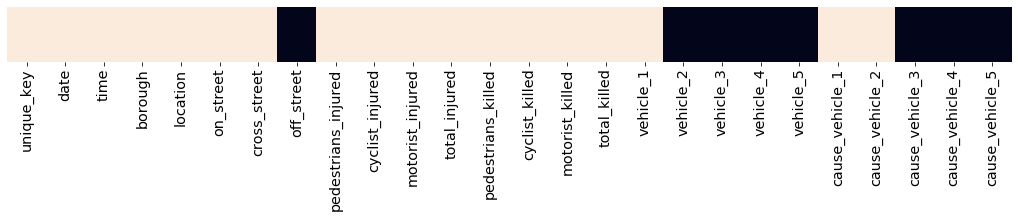

In [18]:
plot_null_matrix(mvc.head(1), figsize=(18,1))

In [19]:
print(mvc.head(1))

   unique_key        date   time    borough                location  \
0     3869058  2018-03-23  21:40  MANHATTAN  (40.742832, -74.00771)   

                          on_street cross_street off_street  \
0  WEST 15 STREET                      10 AVENUE        NaN   

   pedestrians_injured  cyclist_injured  ...          vehicle_1  vehicle_2  \
0                    0                0  ...  PASSENGER VEHICLE        NaN   

   vehicle_3  vehicle_4  vehicle_5        cause_vehicle_1 cause_vehicle_2  \
0        NaN        NaN        NaN  Following Too Closely     Unspecified   

  cause_vehicle_3 cause_vehicle_4 cause_vehicle_5  
0             NaN             NaN             NaN  

[1 rows x 26 columns]


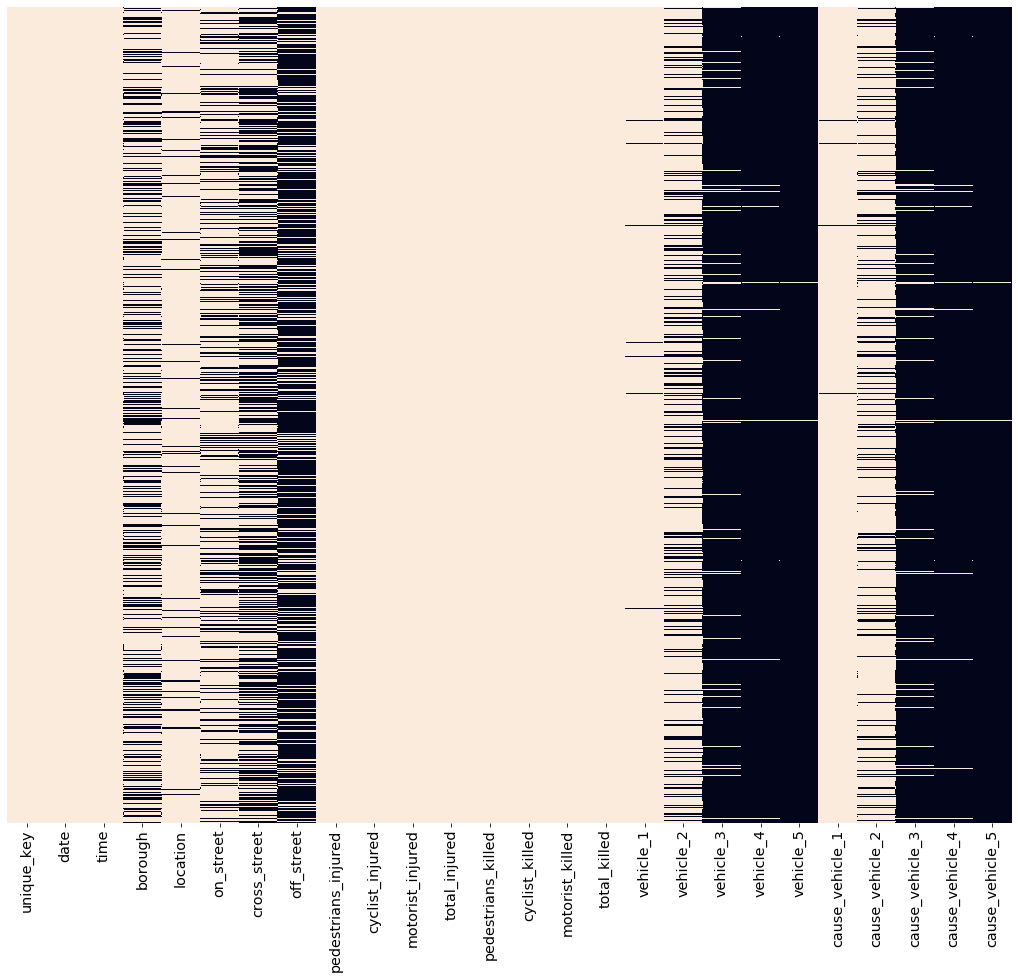

In [20]:
plot_null_matrix(mvc)

### We can make some immediate interpretations about our dataframe:

The first three columns have few to no missing values.

The next five columns have missing values scattered throughout, with each column seeming to have its own density of missing 
values.

The next eight columns are the injury and killed columns we just cleaned, and only have a few missing values.

The last 10 columns seem to break into two groups of five, with each group of five having similar patterns of null/non-null 
values.

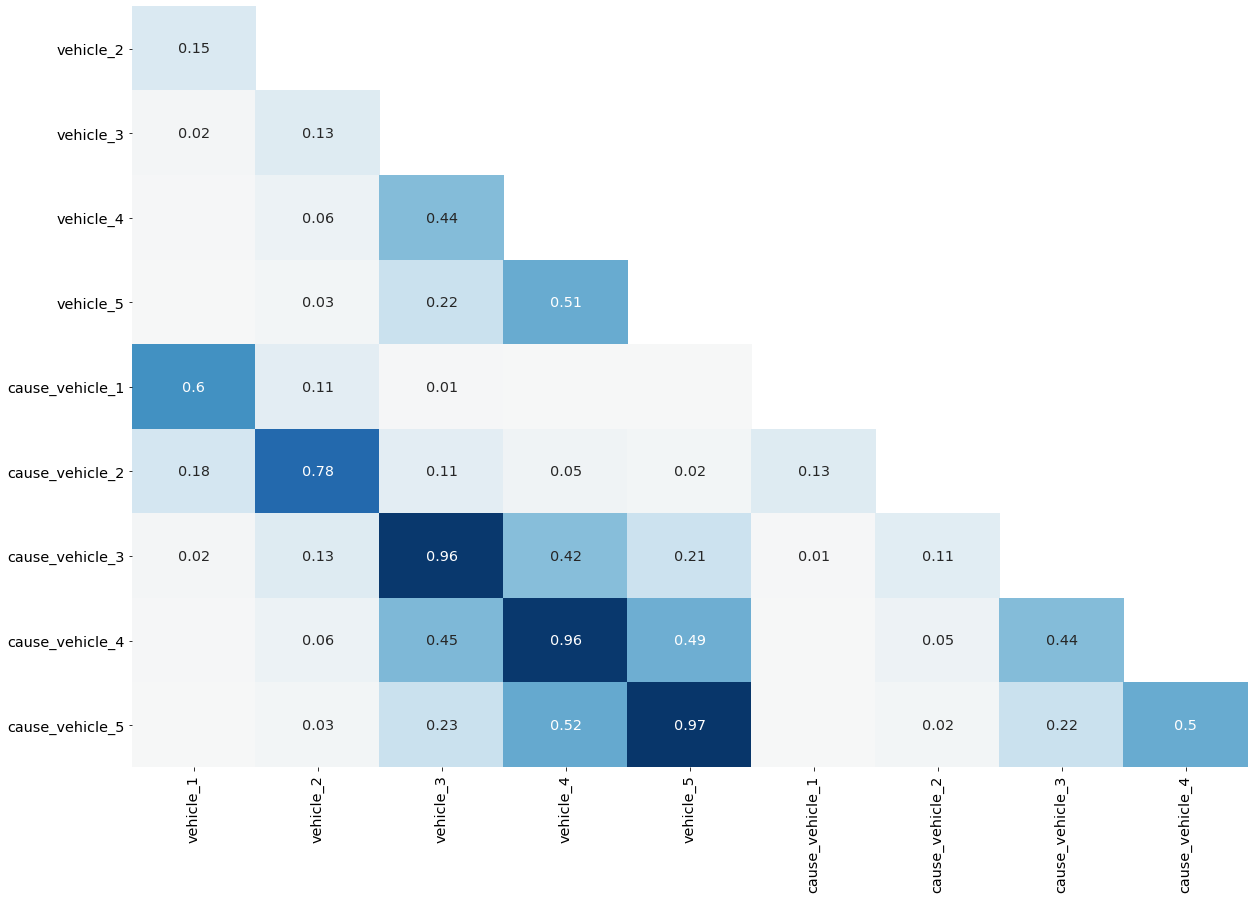

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_null_correlations(df):
    # create a correlation matrix only for columns with at least
    # one missing value
    cols_with_missing_vals = df.columns[df.isnull().sum() > 0]
    missing_corr = df[cols_with_missing_vals].isnull().corr()
    
    # create a mask to avoid repeated values and make
    # the plot easier to read
    missing_corr = missing_corr.iloc[1:, :-1]
    mask = np.triu(np.ones_like(missing_corr), k=1)
    
    # plot a heatmap of the values
    plt.figure(figsize=(20,14))
    ax = sns.heatmap(missing_corr, vmin=-1, vmax=1, cbar=False,
                     cmap='RdBu', mask=mask, annot=True)
    
    # format the text in the plot to make it easier to read
    for text in ax.texts:
        t = float(text.get_text())
        if -0.05 < t < 0.01:
            text.set_text('')
        else:
            text.set_text(round(t, 2))
        text.set_fontsize('x-large')
    plt.xticks(rotation=90, size='x-large')
    plt.yticks(rotation=0, size='x-large')

    plt.show()
veh_cols = [c for c in mvc.columns if 'vehicle' in c]
plot_null_correlations(mvc[veh_cols])

We outlined a diagonal strip of five squares in green that have a higher correlation than the rest. The pairs of column names that make up these five correlations are:

vehicle_1 and cause_vehicle_1
vehicle_2 and cause_vehicle_2
vehicle_3 and cause_vehicle_3
vehicle_4 and cause_vehicle_4
vehicle_5 and cause_vehicle_5
If you think about it, this makes sense. When a vehicle is in an accident, there is likely to be a cause, and vice-versa.

Let's explore the variations in missing values from these five pairs of columns. We'll create a dataframe that counts, for each pair:

The number of values where the vehicle is missing when the cause is not missing.
The number of values where the cause is missing when the vehicle is not missing.

In [22]:
col_labels = ['v_number', 'vehicle_missing', 'cause_missing']

vc_null_data = []

for v in range(1,6):
    
    v_col = 'vehicle_{}'.format(v)
    c_col = 'cause_vehicle_{}'.format(v)
    v_null = (mvc[v_col].isnull() & mvc[c_col].notnull()).sum()
    c_null = (mvc[c_col].isnull() & mvc[v_col].notnull()).sum()
    
    vc_null_data.append([v, v_null, c_null])

vc_null_df = pd.DataFrame(vc_null_data, columns=col_labels)

In [23]:
vc_null_df

,v_number,vehicle_missing,cause_missing
0,1,204,24
1,2,3793,223
2,3,242,24
3,4,50,3
4,5,10,0


The analysis we did on the previous screen indicates that there are roughly 4,500 missing values across the 10 columns. The easiest option for handling these would be to drop the rows with missing values. This would mean **losing almost 10% of the total data**, which is something we ideally want to avoid. So we will impute it with the **mode** of thr value.

we will use value.count after stacking the  dataframe

In [24]:
v_cols = [c for c in mvc.columns if c.startswith("vehicle")]
vehicles = mvc[v_cols]
vehicles_1d = vehicles.stack()
vehicles_counts = vehicles_1d.value_counts()
top10_vehicles = vehicles_counts.head(10)
top10_vehicles

Sedan                                  33133
Station Wagon/Sport Utility Vehicle    26124
PASSENGER VEHICLE                      16026
SPORT UTILITY / STATION WAGON          12356
Taxi                                    3482
Pick-up Truck                           2373
TAXI                                    1892
Box Truck                               1659
Bike                                    1190
Bus                                     1162
dtype: int64

The top "cause" is an **"Unspecified"** placeholder. This is useful instead of a null value as it makes the distinction between a value that is missing because there were only a certain number of vehicles in the collision versus one that is because the contributing cause for a particular vehicle is unknown.

We can use Series.mask() to replace the values.

In [25]:
''' Algo:

In addition to the helper function, we provided the start of the loop you are going to build, including code that generates
each column name as a string.

Uncomment the commented lines (you might want to use this keyboard shortcut).
Add code to the body of the loop that:
Creates a boolean mask for values where the vehicle column is null and the cause column is non-null.
Creates a boolean mask for values where the cause column is null and the vehicle column is non-null.
Uses the first boolean mask to fill matching values from the vehicle column with the string Unspecified.
Uses the second boolean mask to fill matching values from the cause column with the string Unspecified.
Outside the loop, use the summarize_missing() function to check that you have removed all matching values. Assign the result
to summary_after.

'''


def summarize_missing():
    v_missing_data = []

    for v in range(1,6):
        v_col = 'vehicle_{}'.format(v)
        c_col = 'cause_vehicle_{}'.format(v)

        v_missing = (mvc[v_col].isnull() & mvc[c_col].notnull()).sum()
        c_missing = (mvc[c_col].isnull() & mvc[v_col].notnull()).sum()

        v_missing_data.append([v, v_missing, c_missing])

    col_labels = columns=["vehicle_number", "vehicle_missing", "cause_missing"]
    return pd.DataFrame(v_missing_data, columns=col_labels)

summary_before = summarize_missing()

# for v in range(1,6):
#     v_col = 'vehicle_{}'.format(v)
#     c_col = 'cause_vehicle_{}'.format(v)
for v in range(1,6):
    v_col = 'vehicle_{}'.format(v)
    c_col = 'cause_vehicle_{}'.format(v)
    
    v_missing_mask = mvc[v_col].isnull() & mvc[c_col].notnull()
    c_missing_mask = mvc[c_col].isnull() & mvc[v_col].notnull()

    mvc[v_col] = mvc[v_col].mask(v_missing_mask, "Unspecified")
    mvc[c_col] = mvc[c_col].mask(c_missing_mask, "Unspecified")

summary_after = summarize_missing()
summary_before

,vehicle_number,vehicle_missing,cause_missing
0,1,204,24
1,2,3793,223
2,3,242,24
3,4,50,3
4,5,10,0


In [26]:
summary_after

,vehicle_number,vehicle_missing,cause_missing
0,1,0,0
1,2,0,0
2,3,0,0
3,4,0,0
4,5,0,0


supplemental data using the **GeoPy package**, which makes working with Geocoding APIs like the Google Maps API easier.

For rows with location values but missing values in either borough or the street name columns, we used geocoding APIs to look up the location coordinates to find the missing data.

For rows with values in the street name columns missing borough and/or location data, we used geocoding APIs to look up the address to find the missing data.

In [27]:
sup_data = pd.read_csv('supplemental_data.csv')
sup_data.head()

,unique_key,location,on_street,off_street,borough
0,3869058,NaN,NaN,NaN,NaN
1,3847947,NaN,NaN,NaN,NaN
2,3914294,NaN,BELT PARKWAY,NaN,BROOKLYN
3,3915069,NaN,NaN,NaN,NaN
4,3923123,NaN,NaN,NaN,NaN


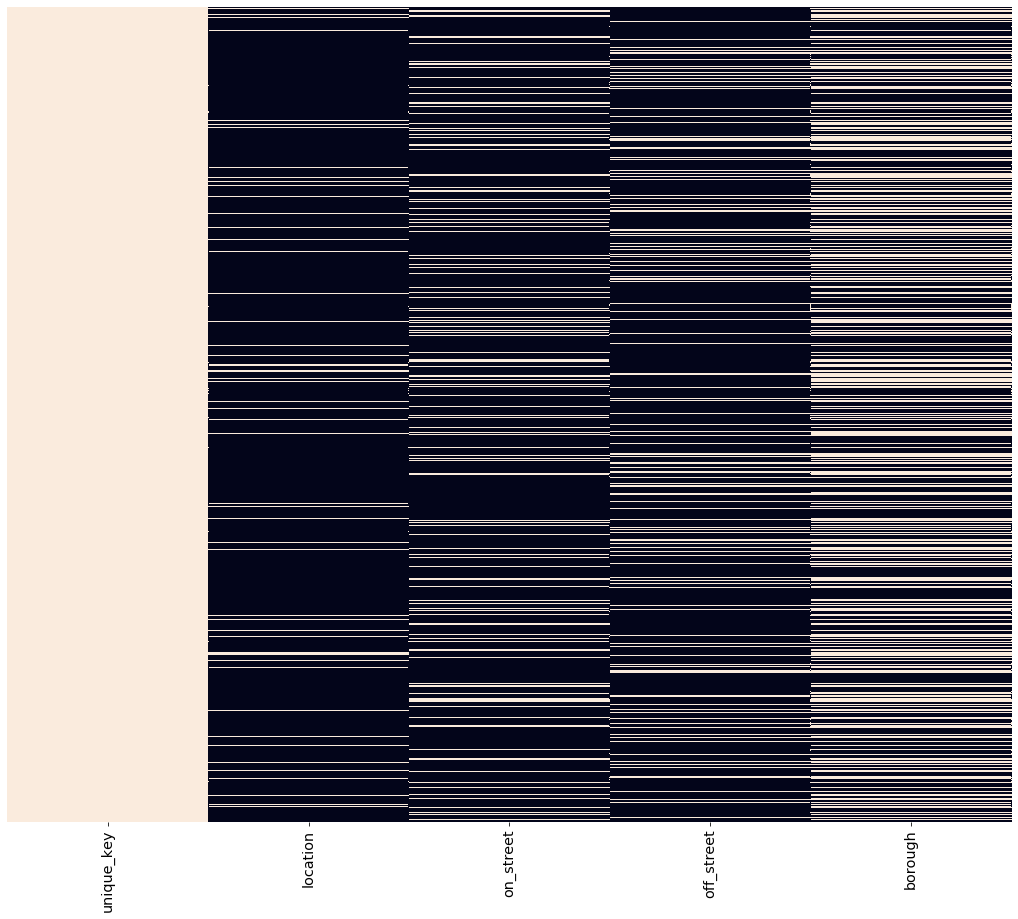

In [28]:
plot_null_matrix(sup_data)

In [29]:
mvc_keys = mvc['unique_key']
sup_keys = sup_data['unique_key']

is_equal = mvc_keys.equals(sup_keys)
print(is_equal)

True


In [30]:
sup_data = pd.read_csv('supplemental_data.csv')

location_cols = ['location', 'on_street', 'off_street', 'borough']
null_before = mvc[location_cols].isnull().sum()
for col in location_cols:
    mvc[col] = mvc[col].mask(mvc[col].isnull(), sup_data[col])

null_after = mvc[location_cols].isnull().sum()


In [31]:
null_after

location         77
on_street     13734
off_street    36131
borough         232
dtype: int64

## what can one do further if needed
Drop the rows that had suspect values for injured and killed totals.

Clean the values in the vehicle_1 through vehicle_5 columns by analyzing the different values and merging duplicates and near-duplicates.

Analyze whether collisions are more likely in certain locations, at certain times, or for certain vehicle types.
